In [1]:
import sys
sys.setrecursionlimit(10**7)
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float64") / 255.0
x_test  = x_test.astype('float64') / 255.0
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
x_train = (x_train.numpy())
x_test = (x_test.numpy())
x_train = np.expand_dims(x_train, axis=3)
x_test  = np.expand_dims(x_test , axis=3)
y_train = y_train.reshape(-1)
y_test  = y_test.reshape(-1)


def processing(Y, n):
    y = np.zeros((Y.shape[0], n))
    for i in range(Y.shape[0]):
        y[i, int(Y[i])] = 1
    return y

y_train = processing(y_train, 10)
y_test  = processing(y_test , 10)

x_validate = x_test[:5000]
y_validate = y_test[:5000]
x_test = x_test[5000:]
y_test = y_test[5000:]

Exception ignored in: <function _xla_gc_callback at 0x000001F84D1BE200>
Traceback (most recent call last):
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\jax\_src\lib\__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


In [2]:
import autograd as ag
from DNN import *

In [3]:
x_train = ag.Var(x_train)
x_test  = ag.Var(x_test)
y_train = ag.Var(y_train)
y_test  = ag.Var(y_test)
x_validate = ag.Var(x_validate)
y_validate = ag.Var(y_validate)

In [4]:
input = Input(shape=(28, 28, 1))
conv2d1 = Layer.Conv2D(16, 3, 1, 1, 'ReLU', input)
max_pool1 = Layer.MaxPool2D(2, 2, conv2d1)
flatten = Layer.Flatten(max_pool1)
layer1 = Layer.Layer(shape=128, activation='ReLU', prev_layer=flatten)
output = Layer.Layer(shape=10, activation='softmax', prev_layer=layer1)
model = Model(input=input, output=output)
model.compile(loss=Loss.CrossEntropy, optimizer=Optimizers.Adam(learning_rate=0.005))

In [5]:
train_cost, train_accuracy, valid_cost, valid_accuracy = model.fit(x_train=x_train, y_train=y_train, x_validate=x_validate, y_validate=y_validate, batch_size=64, epochs=5)
model.evaluate(x_test, y_test)

Epoch: 1
Training. cost: 0.2770117969751595; accuracy: 0.9232333333333334; Validation. cost: 0.34259042245784516; accuracy: 0.904
Time: 266.1693878173828
Epoch: 2
Training. cost: 0.18008212706582105; accuracy: 0.9492333333333334; Validation. cost: 0.22924734682415115; accuracy: 0.9348
Time: 635.3748490810394
Epoch: 3
Training. cost: 0.13627364828365876; accuracy: 0.96015; Validation. cost: 0.181613237493794; accuracy: 0.9464
Time: 646.1022584438324
Epoch: 4
Training. cost: 0.14166755574930318; accuracy: 0.9541333333333334; Validation. cost: 0.1881436831857372; accuracy: 0.94
Time: 517.256819486618
Epoch: 5
Training. cost: 0.14128732151971132; accuracy: 0.9567833333333333; Validation. cost: 0.18628073794997374; accuracy: 0.9416
Time: 270.0371081829071
Cost: 0.1112; Accuracy: 0.9652


(<autograd.Var at 0x1f202cb3510>, <autograd.Var at 0x1f202cb2bd0>)

In [11]:
for i in range(len(train_accuracy)):
    train_accuracy[i] = train_accuracy[i].value
    train_cost[i] = train_cost[i].value
    valid_accuracy[i] = valid_accuracy[i].value
    valid_cost[i] = valid_cost[i].value

In [6]:
import matplotlib.pyplot as plt

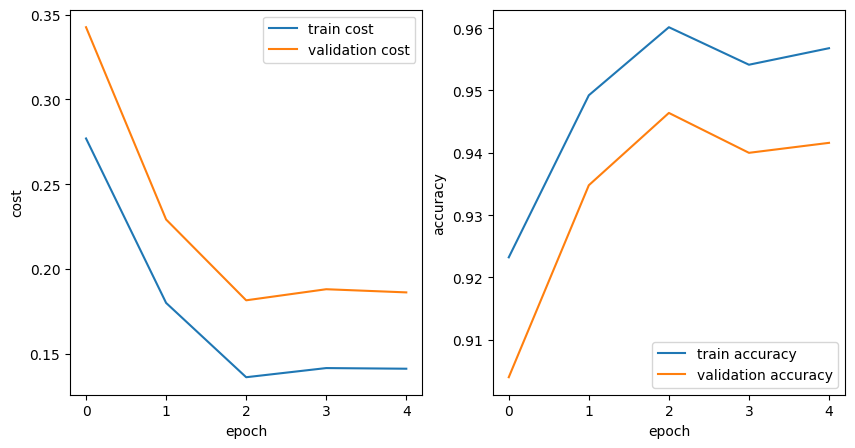

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(train_cost, label='train cost')
ax[0].plot(valid_cost, label='validation cost')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('cost')
ax[0].legend()
ax[1].plot(train_accuracy, label='train accuracy')
ax[1].plot(valid_accuracy, label='validation accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()